Data Segmentation is the process of taking the data and dividing it up and grouping similar data together based on the chosen parameters to use it more efficiently within marketing and operations.

Market segmentation: “Dividing the target market or customers on the basis of some significant features which could help a company sell more products in less marketing expenses.”

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_df= pd.read_csv('loan_analysis.csv')

In [3]:
loan_df.shape[0]

1048563

In [4]:
loan_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,679,1,30.0,2765,0.00,564,560,Individual,NaN,NaN
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,719,4,6.0,21470,0.00,699,695,Individual,NaN,NaN
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,699,0,NaN,7869,0.00,704,700,Joint App,71000.0,13.85
3,66310712,35000,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,...,789,0,NaN,7802,15897.65,679,675,Individual,NaN,NaN
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,699,3,12.0,21929,0.00,704,700,Individual,NaN,NaN


In [5]:
loan_df['loan_status'].value_counts()

Fully Paid            482595
Current               419550
Charged Off           129187
Late (31-120 days)     10879
In Grace Period         4227
Late (16-30 days)       2104
Default                   21
Name: loan_status, dtype: int64

In [6]:
loan_stat= loan_df[(loan_df['loan_status']).isin(['Fully Paid', 'Charged Off', 'Default'])]

In [7]:
loan_stat['loan_status'] = loan_stat['loan_status'].replace({'Charged Off':'Default' , 'Fully Paid':'Good'})

In [8]:
loan_stat['loan_status'].value_counts()

Good       482595
Default    129208
Name: loan_status, dtype: int64

In [9]:
loan_stat['last_fico_range_low'].min()

0

In [10]:
loan_stat['last_fico_range_low']= loan_stat.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'], axis=1)

In [11]:
loan_stat['last_fico_range_low'].min()

500

In [12]:
loan_stat['last_fico_range_low'].value_counts().sort_index()

500     3585
505     3895
510     4328
515     4564
520     5228
525     5197
530     5787
535     5837
540     6496
545     6171
550     6646
555     6130
560     6529
565     6010
570     6370
575     5697
580     6026
585     5353
590     5549
595     5220
600     5289
605     5253
610     5522
615     5220
620     5873
625     5521
630     6426
635     6385
640     7561
645     8082
       ...  
700    20078
705    20119
710    19558
715    19024
720    18867
725    16770
730    16749
735    14020
740    13687
745    11712
750    11513
755    10504
760     9089
765     9172
770     8108
775     8131
780     7364
785     6452
790     6392
795     5318
800     4966
805     4234
810     3412
815     2820
820     1949
825     1497
830      887
835      448
840      246
845      124
Name: last_fico_range_low, Length: 70, dtype: int64

In [13]:
loan_stat['fico_buckets']= pd.cut(loan_stat['last_fico_range_low'],5, labels=['High Risk', 'Risk', 'Low Risk', 'Good', 'Excellent'])

In [14]:
loan_stat['fico_buckets'].value_counts()

Low Risk     222683
Good         186904
Risk          79704
High Risk     76403
Excellent     46109
Name: fico_buckets, dtype: int64

In [15]:
loan_status_df= loan_stat[['loan_status', 'fico_buckets']].groupby(['loan_status','fico_buckets']).agg({'fico_buckets': 'count'})

In [16]:
loan_status_df.rename({'fico_buckets':'count'}, axis='columns').reset_index()

,loan_status,fico_buckets,count
0,Default,High Risk,62487
1,Default,Risk,40171
2,Default,Low Risk,22693
3,Default,Good,3530
4,Default,Excellent,327
5,Good,High Risk,13916
6,Good,Risk,39533
7,Good,Low Risk,199990
8,Good,Good,183374
9,Good,Excellent,45782


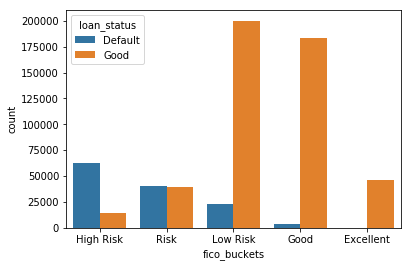

In [17]:
sns.barplot(x= 'fico_buckets', y= 'count', hue='loan_status', data=loan_status_df.rename({'fico_buckets':'count'}, axis='columns').reset_index())

In [18]:
pd.qcut(loan_stat['int_rate'], 5)

0                     (13.33, 16.55]
1                     (10.99, 13.33]
2                      (8.18, 10.99]
4                     (16.55, 30.99]
5                     (13.33, 16.55]
6                      (8.18, 10.99]
7                      (8.18, 10.99]
8          (5.308999999999999, 8.18]
9                     (10.99, 13.33]
12                    (10.99, 13.33]
13                    (16.55, 30.99]
14         (5.308999999999999, 8.18]
15         (5.308999999999999, 8.18]
16         (5.308999999999999, 8.18]
17                    (10.99, 13.33]
19                    (16.55, 30.99]
20                    (10.99, 13.33]
21                    (13.33, 16.55]
22                    (13.33, 16.55]
23                    (13.33, 16.55]
24         (5.308999999999999, 8.18]
25                    (13.33, 16.55]
26         (5.308999999999999, 8.18]
27                    (16.55, 30.99]
28         (5.308999999999999, 8.18]
29         (5.308999999999999, 8.18]
30                    (10.99, 13.33]
3

In [19]:
loan_stat['interest_buckets']= pd.qcut(loan_stat['int_rate'],5, labels=['Low', 'Medium', 'High', 'Very High', 'ForgetIt'])

In [20]:
loan_stat['interest_buckets'].value_counts()

Low          130377
High         127875
Very High    118875
Medium       117920
ForgetIt     116756
Name: interest_buckets, dtype: int64

In [21]:
loan_rate_df= loan_stat[['loan_status', 'interest_buckets']].groupby(['loan_status','interest_buckets']).agg({'interest_buckets': 'count'})

In [22]:
loan_rate_df.rename({'interest_buckets':'count'}, axis='columns').reset_index()

,loan_status,interest_buckets,count
0,Default,Low,8572
1,Default,Medium,16128
2,Default,High,25441
3,Default,Very High,32580
4,Default,ForgetIt,46487
5,Good,Low,121805
6,Good,Medium,101792
7,Good,High,102434
8,Good,Very High,86295
9,Good,ForgetIt,70269


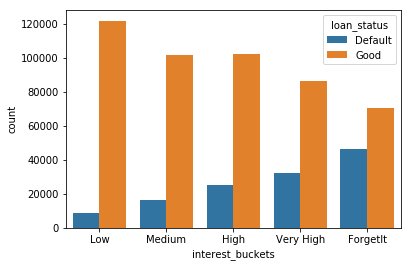

In [23]:
sns.barplot(x= 'interest_buckets', y= 'count', hue='loan_status', data=loan_rate_df.rename({'interest_buckets':'count'}, axis='columns').reset_index())

In [24]:
loan_stat[['loan_status', 'interest_buckets', 'fico_buckets']].groupby(['fico_buckets','interest_buckets']).agg({'loan_status': 'count'})

loan_status
fico_buckets interest_buckets             
High Risk    Low                      4821
             Medium                   9643
             High                    16080
             Very High               19819
             ForgetIt                26040
Risk         Low                      7162
             Medium                  11806
             High                    18385
             Very High               19204
             ForgetIt                23147
Low Risk     Low                     33000
             Medium                  44070
             High                    51648
             Very High               48148
             ForgetIt                45817
Good         Low                     59777
             Medium                  43395
             High                    36022
             Very High               28051
             ForgetIt                19659
Excellent    Low                     25617
             Medium                   9006
             High                     5740
             Very High                3653
             ForgetIt                 2093

In [25]:
pd.crosstab(index= loan_stat['fico_buckets'],columns=loan_stat['interest_buckets'], margins=True)

interest_buckets,Low,Medium,High,Very High,ForgetIt,All
fico_buckets,,,,,,
High Risk,4821,9643,16080,19819,26040,76403
Risk,7162,11806,18385,19204,23147,186904
Low Risk,33000,44070,51648,48148,45817,79704
Good,59777,43395,36022,28051,19659,222683
Excellent,25617,9006,5740,3653,2093,46109
All,116756,127875,117920,130377,118875,611803


In [26]:
pd.crosstab(index= loan_stat['fico_buckets'],columns=loan_stat['interest_buckets']).apply(lambda x: (x/x.sum())*100,axis=1)

interest_buckets,Low,Medium,High,Very High,ForgetIt
fico_buckets,,,,,
High Risk,6.309962,12.621232,21.046294,25.940081,34.082431
Risk,8.985747,14.812306,23.066596,24.094148,29.041202
Low Risk,14.819272,19.790464,23.193508,21.621767,20.574988
Good,31.982729,23.217802,19.272996,15.008240,10.518234
Excellent,55.557483,19.531979,12.448763,7.922531,4.539244


In [27]:
fico_rate_ct= pd.crosstab(index= loan_stat['fico_buckets'],columns=loan_stat['interest_buckets'])

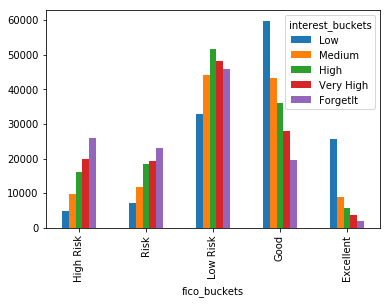

In [28]:
fico_rate_ct.plot.bar()

In [29]:
(chi2, p, dof,_) = stats.chi2_contingency([fico_rate_ct.iloc[0].values,fico_rate_ct.iloc[1].values,fico_rate_ct.iloc[2].values,fico_rate_ct.iloc[3].values, fico_rate_ct.iloc[4].values])

In [30]:
print('chi2:', chi2)
print('p-value:', p)
print('Degree of Freedom:', dof)

chi2: 94025.13343840712
p-value: 0.0
Degree of Freedom: 16


In [31]:
#Creating a new column
import math
loan_stat['fico_score']= loan_stat['last_fico_range_low'].apply(lambda x: (math.ceil(x/10))*10)

In [32]:
loan_stat.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_buckets,interest_buckets,fico_score
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,2765,0.0,564,560,Individual,NaN,NaN,High Risk,Very High,560
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,21470,0.0,699,695,Individual,NaN,NaN,Low Risk,High,700
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,7869,0.0,704,700,Joint App,71000.0,13.85,Low Risk,Medium,700
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,21929,0.0,704,700,Individual,NaN,NaN,Low Risk,ForgetIt,700
5,68426831,11950,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,8822,0.0,759,755,Individual,NaN,NaN,Good,Very High,760


In [33]:
loan_stat[loan_stat['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     3183
510     7191
520     8370
530     9254
540    10127
550    10164
560     9703
570     9060
580     8004
590     6852
600     5881
610     5195
620     4468
630     3708
640     2898
650     2310
660     4091
670     5232
680     3918
690     2875
700     2027
710     1515
720     1024
730      613
740      447
750      298
760      230
770      167
780      136
790       92
800       72
810       52
820       28
830       14
840        6
850        3
Name: fico_score, dtype: int64

In [34]:
fico_df= pd.DataFrame(loan_stat[loan_stat['loan_status']=='Default']['fico_score'].value_counts().sort_index())

In [35]:
fico_df= fico_df.reset_index()

In [36]:
fico_df.columns = ['fico_score', 'default_total']

In [37]:
fico_df

,fico_score,default_total
0,500,3183
1,510,7191
2,520,8370
3,530,9254
4,540,10127
5,550,10164
6,560,9703
7,570,9060
8,580,8004
9,590,6852


In [38]:
fico_df[['fico_score', 'default_total']].corr()

,fico_score,default_total
fico_score,1.000000,-0.886782
default_total,-0.886782,1.000000


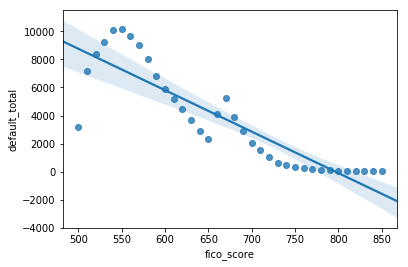

In [39]:
sns.regplot(x='fico_score', y= 'default_total', data=fico_df)

In [40]:
fico_df[['fico_score', 'default_total']].corr('spearman')

,fico_score,default_total
fico_score,1.000000,-0.939511
default_total,-0.939511,1.000000


In [41]:
!pip install pwlf
import pwlf

In [42]:
pwlf= pwlf.PiecewiseLinFit(fico_df['fico_score'], fico_df['default_total'])

In [43]:
pwise_model= pwlf.fit(4)

In [44]:
pwlf.fit_breaks

array([500.        , 536.3924355 , 619.99999999, 759.15149189,
       850.        ])

In [45]:
pwlf.intercepts

array([-92869.4619722 ,  53243.42935661,  24171.27624223,   2027.6953994 ])

In [46]:
pwlf.slopes

array([193.92031812, -78.47892106, -31.58835152,  -2.41949513])

In [47]:
yhat_piecewise= pwlf.predict(fico_df['fico_score'])

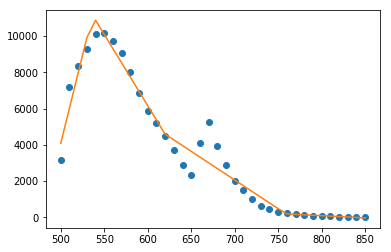

In [48]:
plt.figure()
plt.plot(fico_df['fico_score'], fico_df['default_total'], 'o')
plt.plot(fico_df['fico_score'], yhat_piecewise, '-')
plt.show()